In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

def show_digit_image(data):
    """Show a digit as an image.
    
    Arguments
    data -- The image data.
    """
    fig, ax = plt.subplots()
    ax.imshow(data.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([]);

# Density Estimation with High-dimensional Data

## Objectives

+ Combine principal component analysis with the Gaussian mixture model to solve high-dimensional density estimation problems

In this hands-on activity we are going to create a model that can sample hand-written digits.
To achieve this, we are going to use PCA to reduce the dimensionality of the MNIST images and then apply Gaussian mixture density estimation on the principal components.
The resulting model will not be perfect, but it very simple and a decent start.
For simplicity, we are going to work only with the threes.

Start by loading the data and extracting the threes:

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

# Split data into train partition and test partition
np.random.seed(12345)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

Apply PCA to the threes keeping just a few components:

In [3]:
from sklearn.decomposition import PCA

threes = x_train[y_train == '3']
num_components = 2
pca = PCA(
    n_components=num_components,
    whiten=True
).fit(threes)

Now use the Gaussian mixture model on the principal components.
We are also going to use BIC to figure out what is the right number of mixture components.

In [4]:
from sklearn.mixture import GaussianMixture

Z = pca.transform(threes)

max_num_components = 11
bics = np.ndarray((max_num_components - 1, ))
models = []
for nmc in range(1, max_num_components):
    m = GaussianMixture(n_components=nmc).fit(Z)
    bics[nmc-1] = m.bic(Z)
    models.append(m)

Here are the BICS:

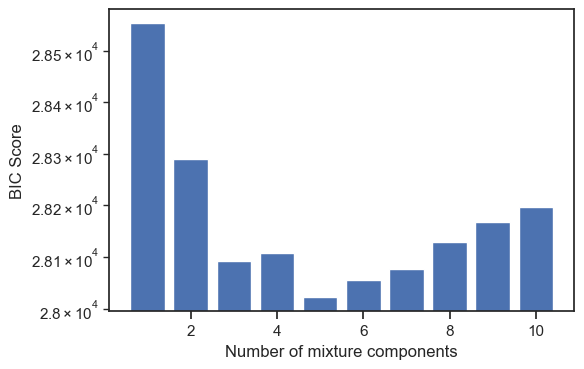

In [5]:
fig, ax = plt.subplots()
ax.bar(range(1, max_num_components), bics)
ax.set_yscale('log')
ax.set_ylabel('BIC Score')
ax.set_xlabel('Number of mixture components');

Let's find the mixture model with the smallest BIC:

In [6]:
model = models[np.argmin(bics)]
print(model)

GaussianMixture(n_components=5)


Now let's sample some random threes...

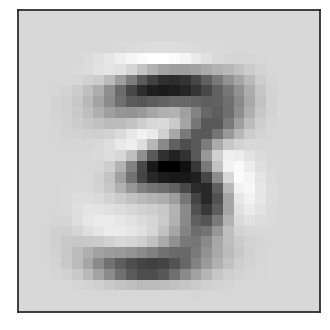

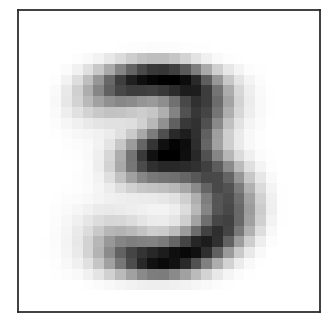

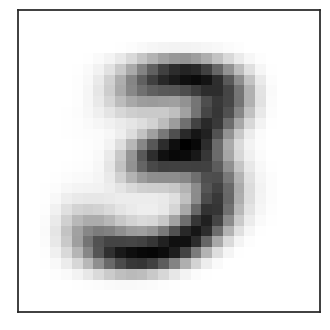

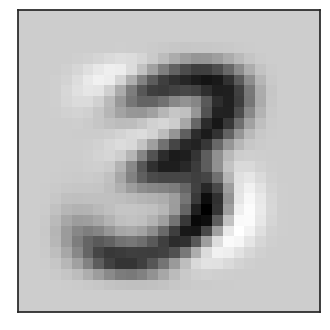

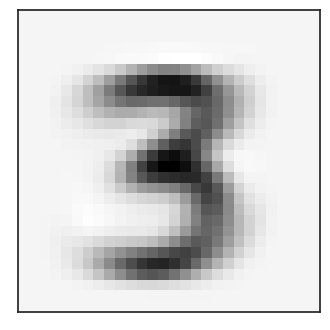

In [7]:
for i in range(5):
    z = model.sample()[0]
    x = pca.inverse_transform(z[None, :])
    show_digit_image(x)

### Question

+ Try the same code above with ones instead of threes. You just need to modify the code line ``threes = x_train[y_train == 3]`` to ``threes = x_train[y_train == 1]``. Don't bother about renaming the variables.

+ Try increasing the number of PCA components (3, 5, 10, 20). Do the results improve or become worse? What seems to be the problem?